# **Project Title: Mushroom Classification**

**Importing Necessary Libraries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier


from sklearn.metrics import classification_report, ConfusionMatrixDisplay,accuracy_score
import warnings
warnings.filterwarnings(action='ignore')

# **Load the dataset**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/LuminarDataSets/mushrooms.csv')

In [ ]:
# Load first 5 observations:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
# Shape of DF:
df.shape

(8124, 23)

In [ ]:
# Checking Data Types:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [ ]:
# Renaming the first feature - class as Consumeable:
df.rename(columns={'class':'Consumeable'},inplace = True)
print(df.columns)

Index(['Consumeable', 'cap-shape', 'cap-surface', 'cap-color', 'bruises',
       'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')


In [ ]:
# Checking for Duplicates :
df.duplicated().sum()

0

**No Duplicate values available**

In [ ]:
# Checking Null values:
df.isna().sum()

Consumeable                 0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

**No Null values are there**

In [ ]:
# Separate X and y values for model building:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [ ]:
print('X - shape:',X.shape)
print('y - shape:',y.shape)

X - shape: (8124, 22)
y - shape: (8124,)


# **Encode Categorical Data**

In [ ]:
le = LabelEncoder()
cols = list(X.columns)
print(cols)

['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']


In [ ]:
for i in cols:
  X[i] = le.fit_transform(X[i])

In [ ]:
X.dtypes

cap-shape                   int64
cap-surface                 int64
cap-color                   int64
bruises                     int64
odor                        int64
gill-attachment             int64
gill-spacing                int64
gill-size                   int64
gill-color                  int64
stalk-shape                 int64
stalk-root                  int64
stalk-surface-above-ring    int64
stalk-surface-below-ring    int64
stalk-color-above-ring      int64
stalk-color-below-ring      int64
veil-type                   int64
veil-color                  int64
ring-number                 int64
ring-type                   int64
spore-print-color           int64
population                  int64
habitat                     int64
dtype: object

# **Separate X and y values as training and test data**

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)
print('X_train shape:',X_train.shape)
print('y_train shape:',y_train.shape)
print('X_test shape:',X_test.shape)
print('y_test shape:',y_test.shape)

X_train shape: (5686, 22)
y_train shape: (5686,)
X_test shape: (2438, 22)
y_test shape: (2438,)


## **Model Building: KNN Algorithm, SVM Algorithm, Decision Tree Algorithm, Naive Bayes Algorithm, Random Forest algorithm, Ada Boost algorithm**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
sv = SVC()
dtree = DecisionTreeClassifier(criterion='entropy',random_state=1)
nb = GaussianNB()
rf = RandomForestClassifier(n_estimators=50)
ad_boost = AdaBoostClassifier()


------------------------------ KNeighborsClassifier() ------------------------------
Classification Report:
               precision    recall  f1-score   support

           e       1.00      1.00      1.00      1236
           p       1.00      1.00      1.00      1202

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

------------------------------ SVC() ------------------------------
Classification Report:
               precision    recall  f1-score   support

           e       0.97      1.00      0.99      1236
           p       1.00      0.97      0.99      1202

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438

------------------------------ DecisionTreeClassifier(criterion='entropy', random_state=1) ------------------------------
Classification Report:


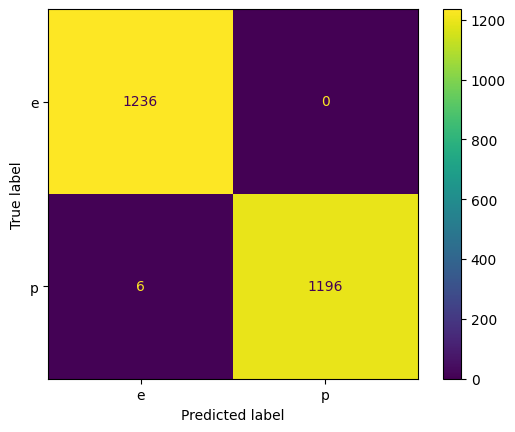

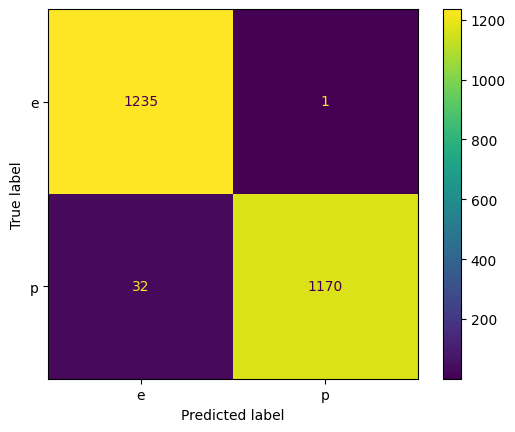

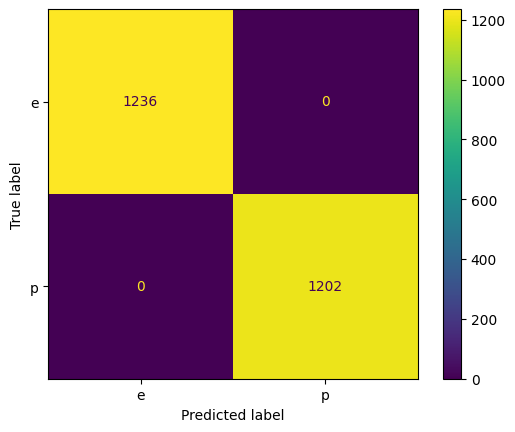

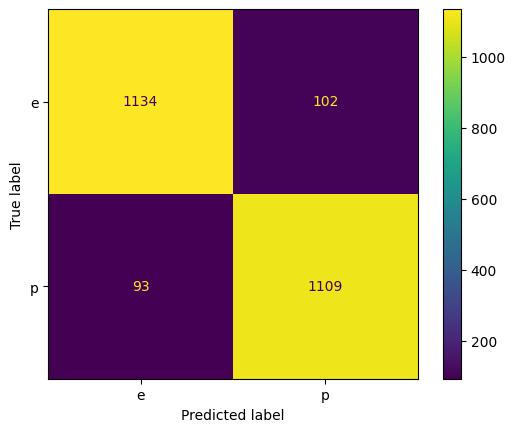

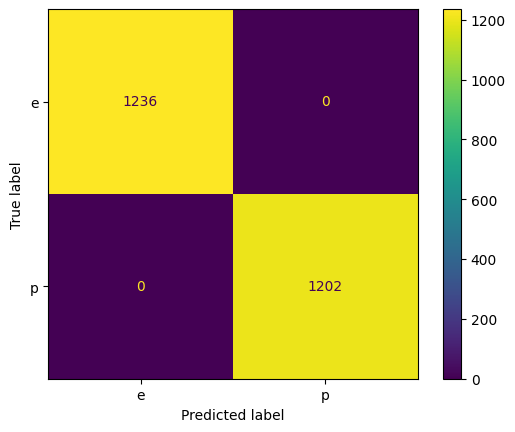

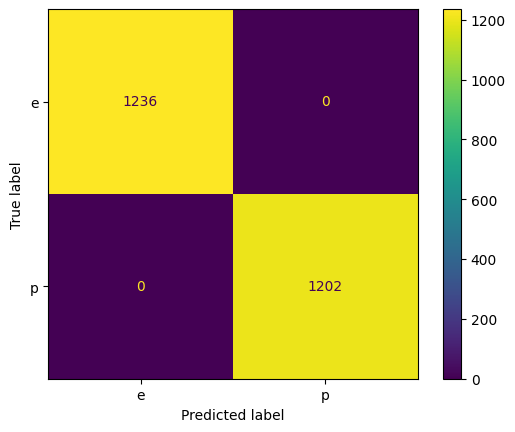

In [ ]:
models = [knn,sv,dtree,nb,rf,ad_boost]
Accuracy_Score = {}

for model in models:
  print("-"*30,model,'-'*30)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  Accuracy_Score[model]=accuracy_score(y_test,y_pred)*100
  print('Classification Report:\n',classification_report(y_test,y_pred))
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

In [ ]:
print(Accuracy_Score)

{KNeighborsClassifier(): 99.75389663658737, SVC(): 98.64643150123051, DecisionTreeClassifier(criterion='entropy', random_state=1): 100.0, GaussianNB(): 92.00164068908941, RandomForestClassifier(n_estimators=50): 100.0, AdaBoostClassifier(): 100.0}


# **Insights From Model Building:**

# **KNeighbors Classifier:**

*   **Accuracy_Score: 99.7 %**
*   **precision: 1**

*   **recall: 1**

# **Support Vector Machine Classifier:**

*   **Accuracy_Score: 98.64%**

*   **precision:0.97**
*   **recall: 1**

# **Decision Tree Classifier:**

*   **Accuracy_Score: 100%**
*   **precision: 1**

*   **recall:1**

# **Naive Bayes Classifier:**

*   **Accuracy_Score: 92%**

*   **precision:0.92**
*   **recall: 0.92**

# **Random Forest Classifier:**

*   **Accuracy_Score: 100%**
*   **precision: 1**

*   **recall: 1**

# **Ada Boost Classifier:**

*   **Accuracy_Score:100%**

*   **precision: 1**
*   **recall: 1**












































# **DecisionTree Classifier , RandomForest Classifier and AdaBoost Classifier generated Accuracy Score of 100%.**

# **Therefore we can conclude that above three Machine Learning Models are suitable for Classifying our Mushroom Data Set.**